<a href="https://colab.research.google.com/github/karthikmohan1702/EIP_4/blob/master/Week_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers import SeparableConv2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

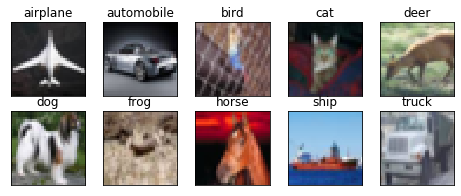

In [99]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model

model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  from ipykernel import ker

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_30 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 23s 60ms/step - loss: 1.8942 - acc: 0.2733 - val_loss: 1.4576 - val_acc: 0.4718
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3613 - acc: 0.5037 - val_loss: 1.1566 - val_acc: 0.5754
Epoch 3/50
390/390 [==============================] - 21s 53ms/step - loss: 1.1417 - acc: 0.5958 - val_loss: 1.0059 - val_acc: 0.6390
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9916 - acc: 0.6537 - val_loss: 0.8451 - val_acc: 0.7141
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9024 - acc: 0.6888 - val_loss: 0.8233 - val_acc: 0.7118
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8364 - acc: 0.7112 - val_loss: 0.7412 - val_acc: 0.7487
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7719 - acc: 0.7365 - val_loss: 0.7114 - val_acc: 0.7556
Epoch 8/50
390/390 [==============================] - 20s 52ms

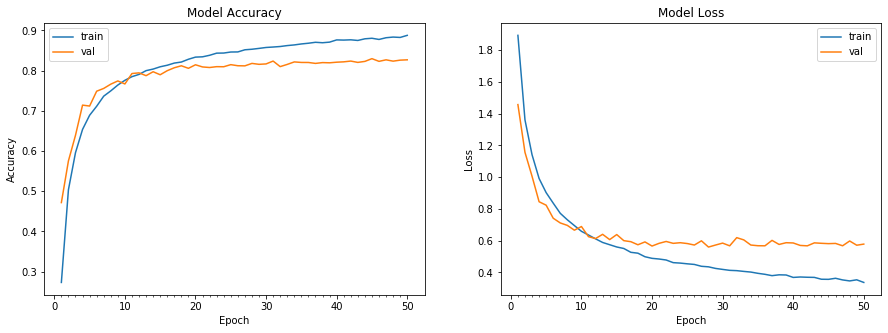

Accuracy on test data is: 82.67


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3),padding = 'valid', strides = (1,1),
                          activation='relu',dilation_rate=1,depth_multiplier = 1,input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 256, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))
model.add(BatchNormalization())
model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 10, kernel_size=(3, 3),padding = 'valid', strides = (1,1),activation='relu',depth_multiplier = 1))

model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64))
#model.add(Activation('relu'))

model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [125]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_209 (Separa (None, 30, 30, 64)        283       
_________________________________________________________________
batch_normalization_206 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_157 (Dropout)        (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_210 (Separa (None, 28, 28, 128)       8896      
_________________________________________________________________
batch_normalization_207 (Bat (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_158 (Dropout)        (None, 14, 14, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  from ipykernel import kernelapp as app


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 56s 145ms/step - loss: 1.6767 - acc: 0.3908 - val_loss: 1.5357 - val_acc: 0.4983
Epoch 2/50
390/390 [==============================] - 48s 123ms/step - loss: 1.3134 - acc: 0.5282 - val_loss: 1.0994 - val_acc: 0.6215
Epoch 3/50
390/390 [==============================] - 48s 123ms/step - loss: 1.1858 - acc: 0.5784 - val_loss: 1.2905 - val_acc: 0.5930
Epoch 4/50
390/390 [==============================] - 48s 123ms/step - loss: 1.0999 - acc: 0.6099 - val_loss: 1.0368 - val_acc: 0.6506
Epoch 5/50
390/390 [==============================] - 48s 123ms/step - loss: 1.0382 - acc: 0.6349 - val_loss: 0.9909 - val_acc: 0.6603
Epoch 6/50
390/390 [==============================] - 48s 123ms/step - loss: 0.9868 - acc: 0.6523 - val_loss: 0.8124 - val_acc: 0.7223
Epoch 7/50
390/390 [==============================] - 47s 122ms/step - loss: 0.9463 - acc: 0.6678 - val_loss: 0.8433 - val_acc: 0.7172
Epoch 8/50
390/390 [==============================] - 47s 121ms/st

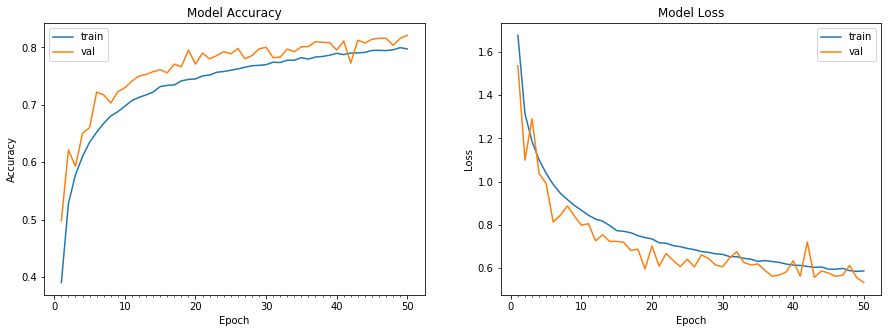

Accuracy on test data is: 82.09


In [123]:
from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(zoom_range=0.0, 
 #                            horizontal_flip=False)

datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,
                             width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))